# Sheet

# 1. Chuẩn bị

## 1.1. Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.2. Import dữ liệu

In [2]:
raw_dataset =  pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [327]:
raw_dataset.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Date
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7


# 2. Khai phá dữ liệu

## 2.1 Xử lý dữ liệu

### 2.1.1. Xử lý dữ liệu bị thiếu

In [3]:
raw_dataset.isna().sum()

Date_reported           0
Country_code         1252
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [5]:
# fill null value with "OT"
raw_dataset['Country_code'] = raw_dataset['Country_code'].fillna('OT')

In [6]:
raw_dataset.isna().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
Year                 0
Month                0
Date                 0
dtype: int64

### 2.1.2. Xử lý dữ liệu dạng datetime

In [4]:
raw_dataset['Date_reported'] = pd.to_datetime(raw_dataset['Date_reported'])
raw_dataset['Year'] = raw_dataset.Date_reported.dt.year
raw_dataset['Month'] = raw_dataset.Date_reported.dt.month
raw_dataset['Date'] = raw_dataset.Date_reported.dt.day

## 2.2. Khai phá dữ liệu

### 2.2.1. Thống kê về các quốc gia

In [328]:
# Đếm số lượng quốc gia khác nhau trong dữ liệu
raw_dataset['Country'].nunique()

237

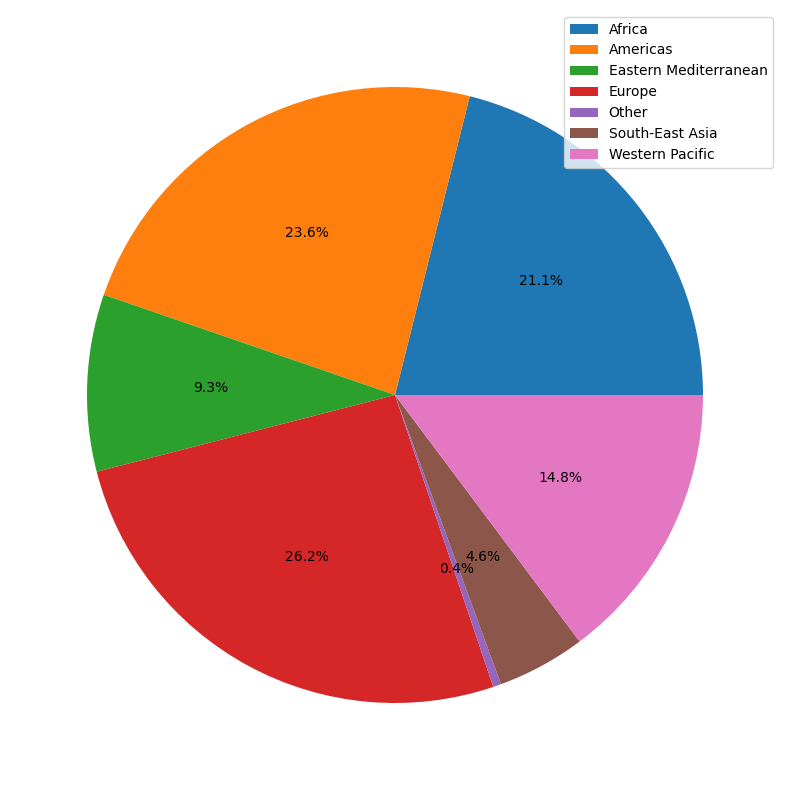

In [329]:
labels = ['Africa', 'Americas', 'Eastern Mediterranean', 'Europe','Other', 'South-East Asia', 'Western Pacific']
# create the pie chart of number of countries divided by "WHO region"
plt.figure(figsize=(10, 10))
plt.pie(raw_dataset.groupby('WHO_region')['Country_code'].nunique(), autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [330]:
raw_dataset_for_visualization = raw_dataset.copy()
raw_dataset_for_visualization.loc[:,'Date_reported'] = pd.to_datetime(raw_dataset_for_visualization.loc[:,'Date_reported'])
raw_dataset_for_visualization = raw_dataset_for_visualization.set_index('Date_reported')

### 2.2.2. Thống kê về số ca mắc, số ca tử vong trên toàn thế giới

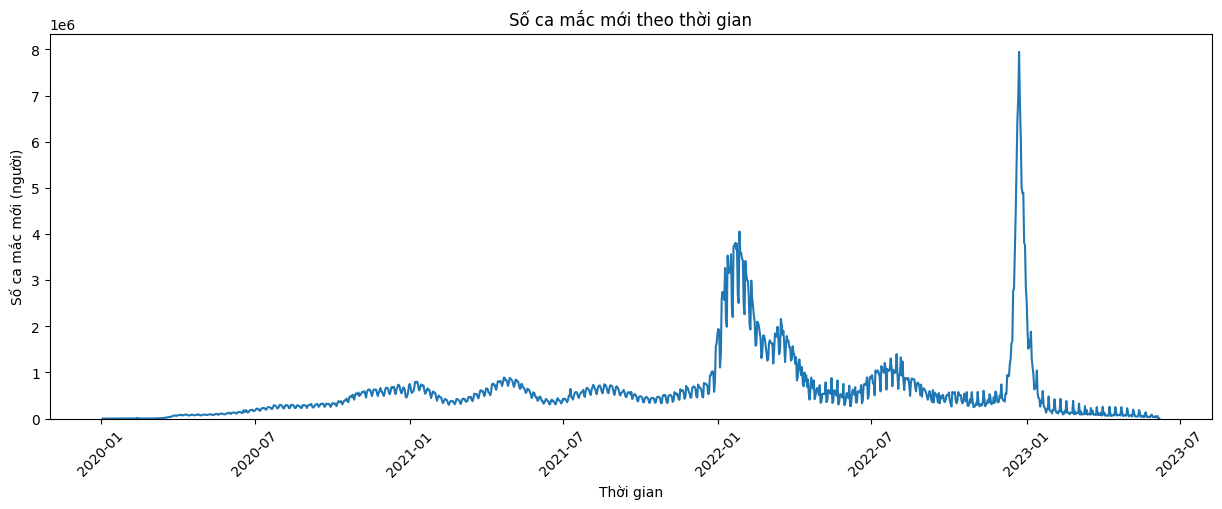

In [331]:
# Tạo biểu đồ đường cho số ca mắc, số ca mất của toàn thế giới theo thời gian
plt.figure(figsize=(15, 5))
plt.plot(raw_dataset_for_visualization.groupby('Date_reported')['New_cases'].sum())
plt.xticks(rotation=45)
plt.xlabel('Thời gian')
plt.ylabel('Số ca mắc mới (người)')
plt.title('Số ca mắc mới theo thời gian')
# set limit for y axis
plt.ylim(0)
plt.show()

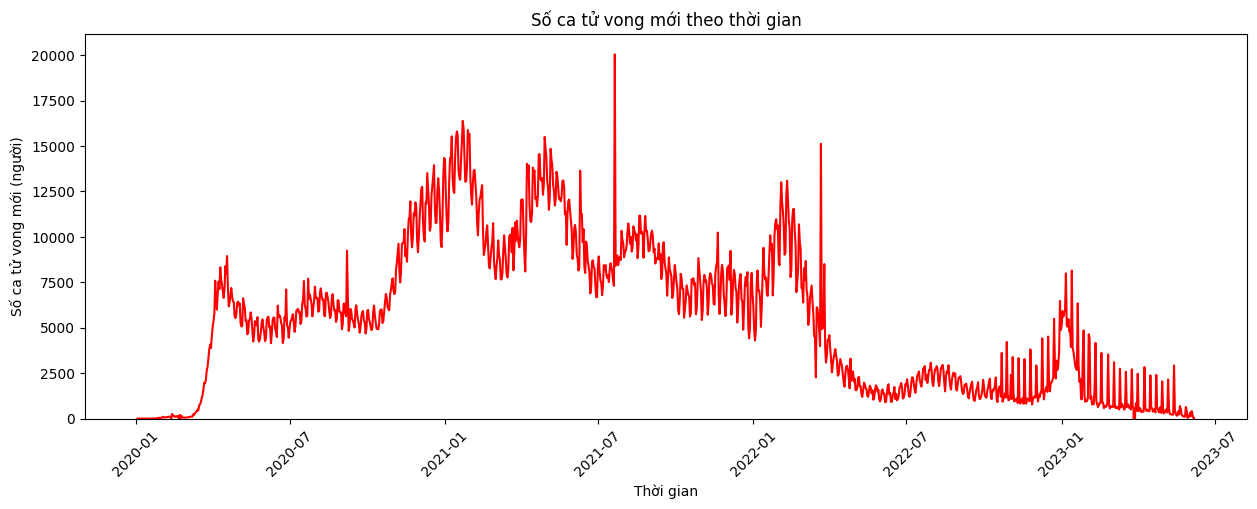

In [332]:
plt.figure(figsize=(15, 5))
plt.plot(raw_dataset_for_visualization.groupby('Date_reported')['New_deaths'].sum(), color='red')
plt.xticks(rotation=45)
plt.xlabel('Thời gian')
plt.ylabel('Số ca tử vong mới (người)')
plt.title('Số ca tử vong mới theo thời gian')
plt.ylim(0)
plt.show()

In [333]:
country=raw_dataset_for_visualization.groupby('Country')
vietnam=country.get_group("Viet Nam")
china=country.get_group("China")
usa=country.get_group("United States of America")
italy=country.get_group('Italy')
india=country.get_group('India')
country=[vietnam, china, usa, italy, india]

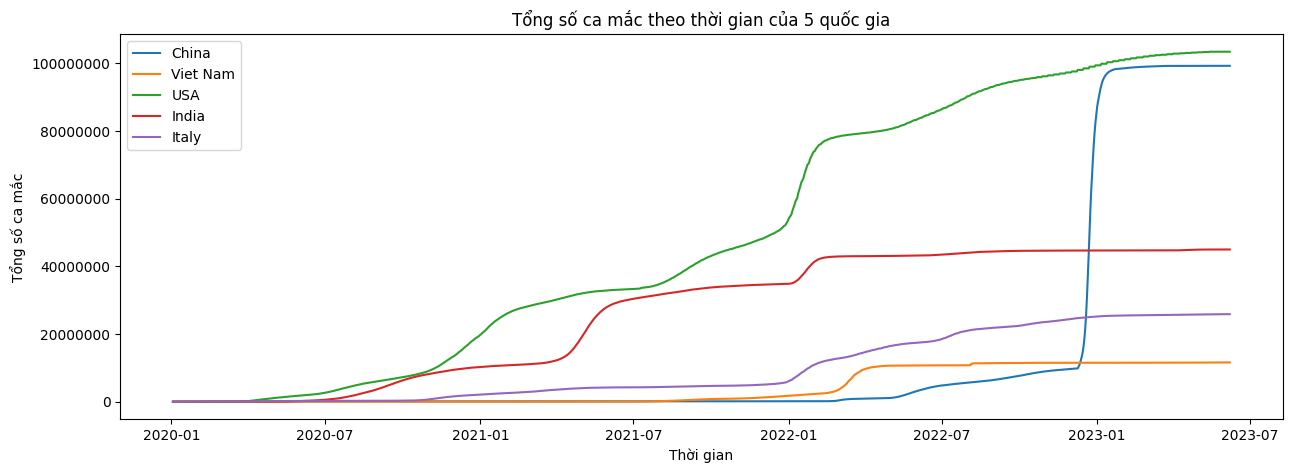

In [334]:
plt.figure(figsize=(15, 5))
plt.plot(china['Cumulative_cases'], label="China")
plt.plot(vietnam['Cumulative_cases'], label="Viet Nam")
plt.plot(usa['Cumulative_cases'], label="USA")
plt.plot(india['Cumulative_cases'], label="India")
plt.plot(italy['Cumulative_cases'], label="Italy")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Tổng số ca mắc")
plt.xlabel("Thời gian")
plt.title("Tổng số ca mắc theo thời gian của 5 quốc gia")
plt.legend()
plt.show()

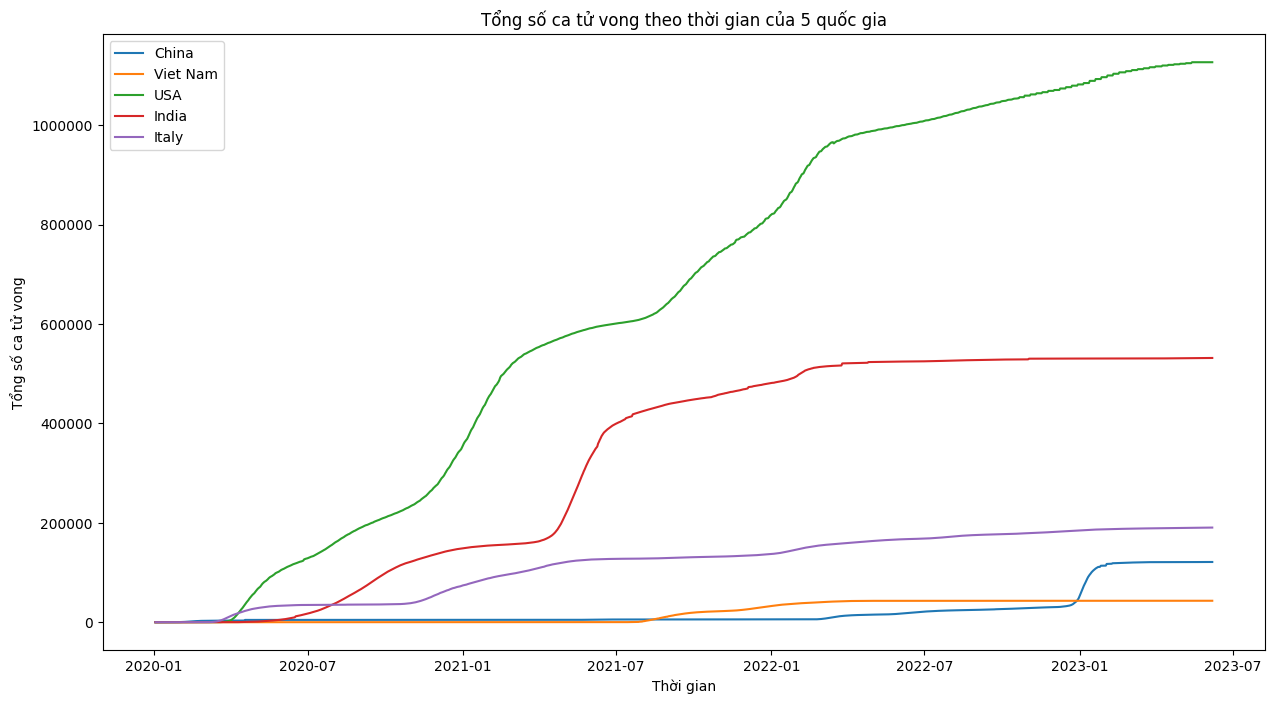

In [335]:
plt.figure(figsize=(15, 8))
plt.plot(china['Cumulative_deaths'], label="China")
plt.plot(vietnam['Cumulative_deaths'], label="Viet Nam")
plt.plot(usa['Cumulative_deaths'], label="USA")
plt.plot(india['Cumulative_deaths'], label="India")
plt.plot(italy['Cumulative_deaths'], label="Italy")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Tổng số ca tử vong")
plt.xlabel("Thời gian")
plt.title("Tổng số ca tử vong theo thời gian của 5 quốc gia")
plt.legend()
plt.show()

#### 2.2.2.1. Việt Nam

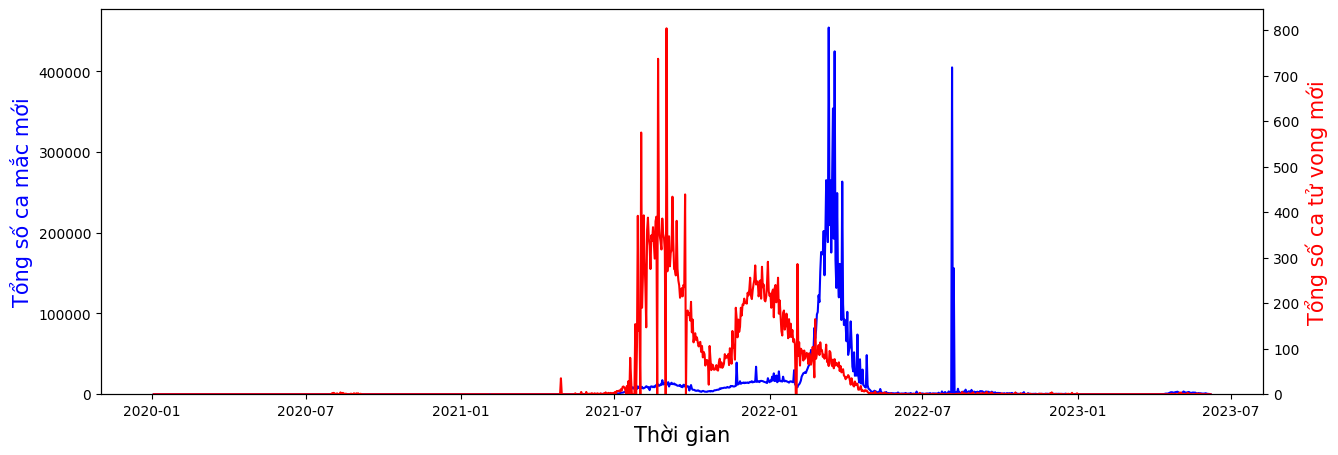

In [188]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
ax1.plot(vietnam['New_cases'], 'b-')
ax2.plot(vietnam['New_deaths'], 'r-')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Tổng số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Tổng số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

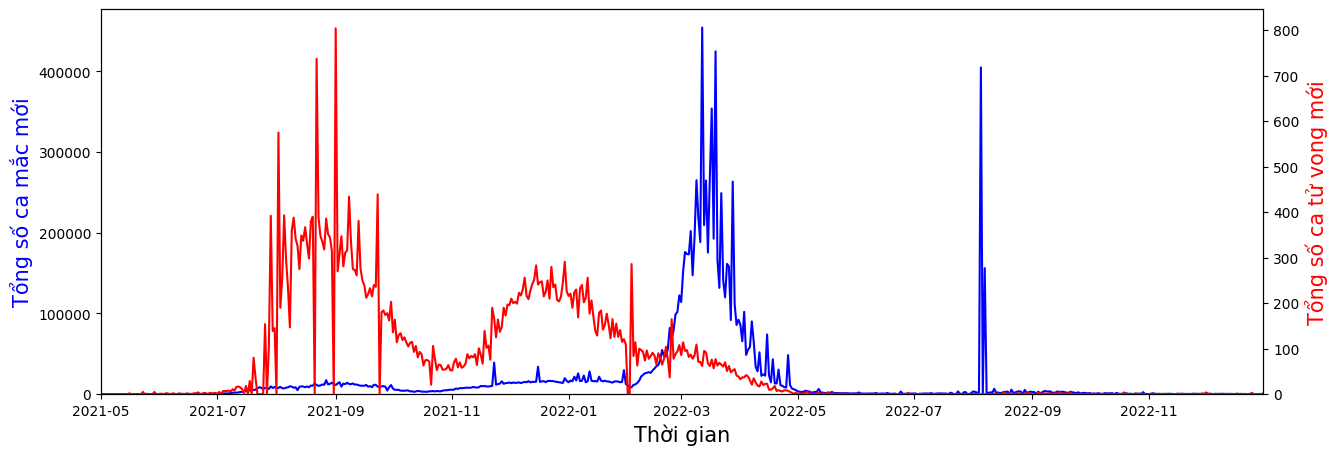

In [187]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
ax1.plot(vietnam['New_cases'], 'b-')
ax2.plot(vietnam['New_deaths'], 'r-')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)
ax1.set_xlim(pd.Timestamp('2021-05-01'), pd.Timestamp('2022-12-31'))

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Tổng số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Tổng số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

#### 2.2.2.2. Trung Quốc

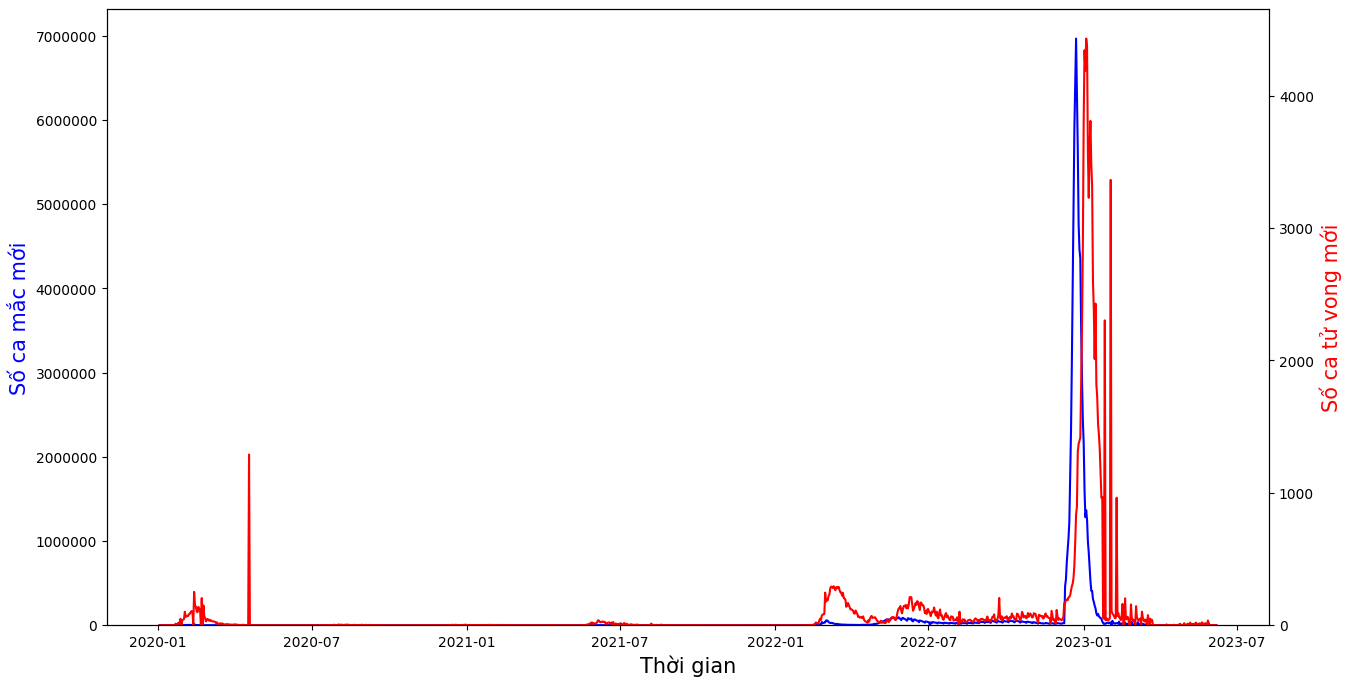

In [336]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()
ax1.plot(china['New_cases'], 'b')
ax2.plot(china['New_deaths'], 'r')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

#### 2.2.2.3. Hoa Kỳ

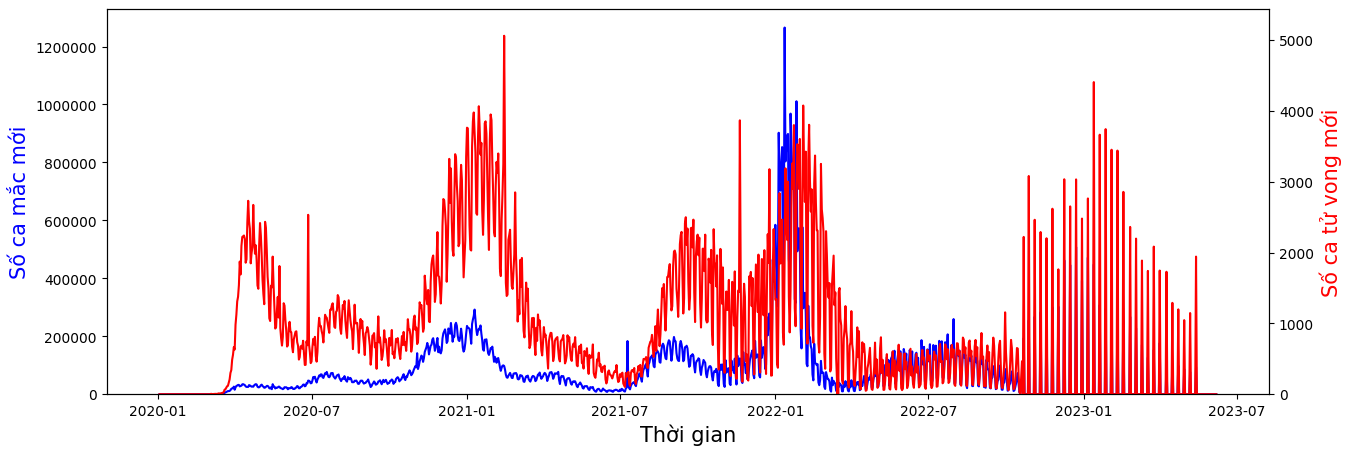

In [186]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
ax1.plot(usa['New_cases'], 'b-')
ax2.plot(usa['New_deaths'], 'r-')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

#### 2.2.2.4. Ý

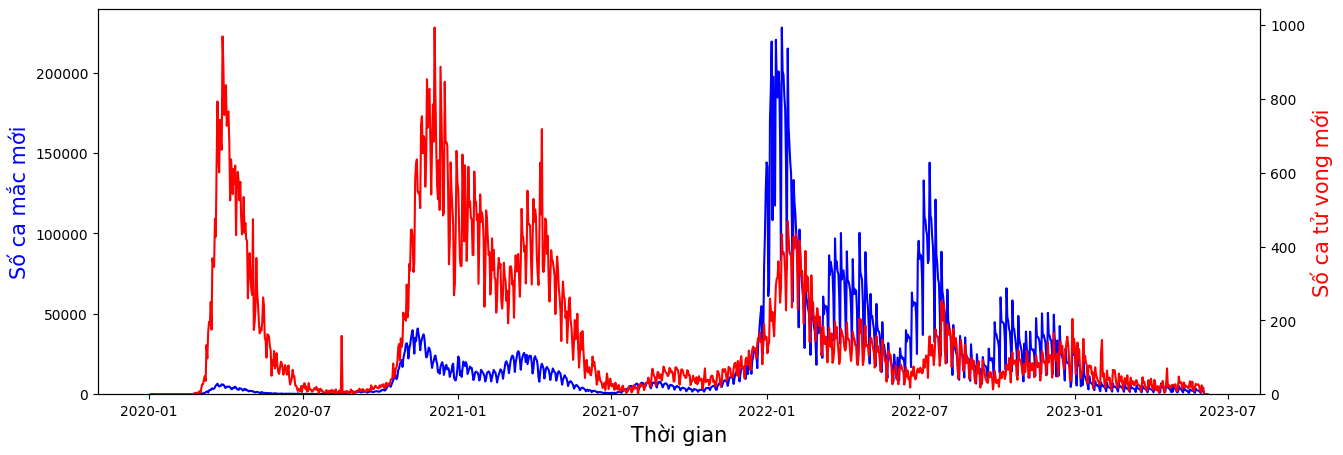

In [185]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
ax1.plot(italy['New_cases'], 'b-')
ax2.plot(italy['New_deaths'], 'r-')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

#### 2.2.2.4. Ấn Độ

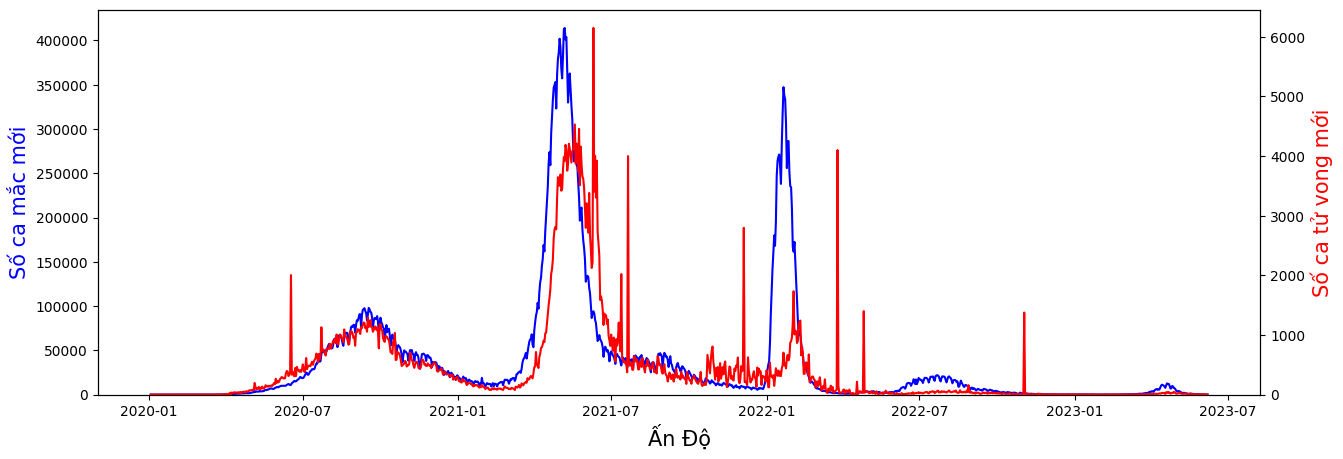

In [180]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()
ax1.plot(india['New_cases'], 'b-')
ax2.plot(india['New_deaths'], 'r-')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0)
ax2.set_ylim(0)

ax1.set_xlabel('Thời gian', fontdict={'size': 15})
ax1.set_ylabel('Số ca mắc mới', color='b', fontdict={'size': 15})
ax2.set_ylabel('Số ca tử vong mới', color='r', fontdict={'size': 15})
plt.show()

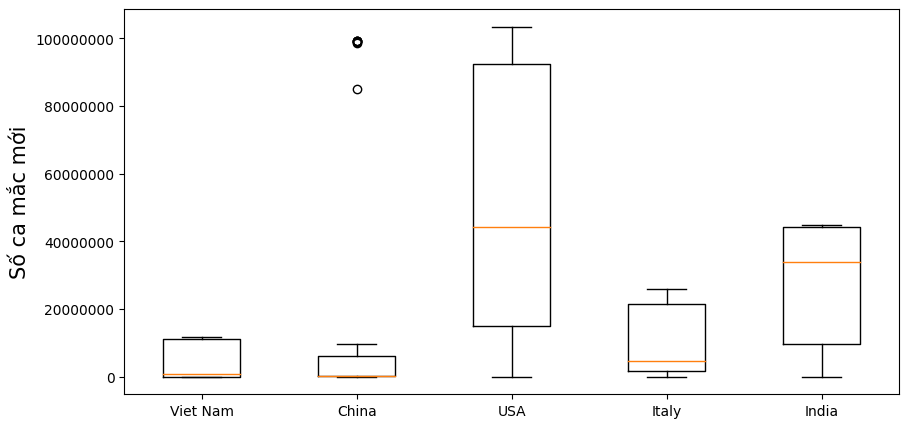

In [184]:
infected=[]
for i in country:
    infected.append(i.groupby(['Country', 'Year', 'Month']).last()['Cumulative_cases'])
plt.figure(figsize=(10, 5))
plt.boxplot(infected, labels=['Viet Nam', 'China', "USA", 'Italy', 'India'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Số ca mắc mới', fontdict={'size': 15})
plt.show()

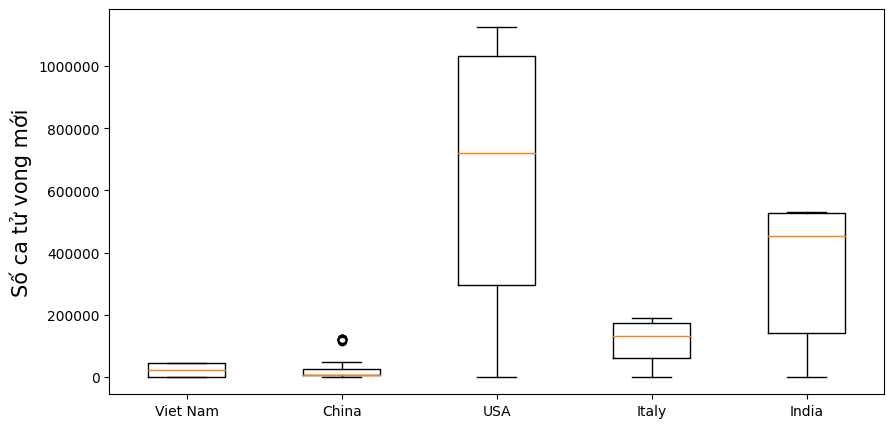

In [192]:
deaths=[]
for i in country:
    deaths.append(i.groupby(['Country', 'Year', 'Month']).last()['Cumulative_deaths'])
plt.figure(figsize=(10, 5))
plt.boxplot(deaths, labels=['Viet Nam', 'China', "USA", 'Italy', 'India'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Số ca tử vong mới', fontdict={'size': 15})
plt.show()

# 3. Tạo và huấn luyện mô hình

## 3.1. Tạo mô hình

In [467]:
class AnalysisByCountry:
    def __init__(self, country_code):

        # init field
        self.best_model_evaluation = None
        self.best_model = None
        self.save_model_result = None
        self.X_train = None
        self.y_train = None
        self.X_valid = None
        self.y_valid = None
        self.X_test = None
        self.y_test = None

        # check if country code is valid
        if country_code not in raw_dataset['Country_code'].unique():
            raise ValueError('Invalid country code')
        self.country_code = country_code
        self.country_name = raw_dataset[raw_dataset['Country_code'] == country_code]['Country'].unique()[0]
        self.raw_data = raw_dataset[raw_dataset['Country_code'] == country_code]
        self.data_for_analysis = self.raw_data.loc[:,['Date_reported', 'New_cases', 'New_deaths']]
        self.data_for_analysis.loc[:,'Date_reported'] = pd.to_datetime(self.data_for_analysis.loc[:,'Date_reported'])
        self.data_for_analysis = self.data_for_analysis.set_index('Date_reported')

    def create_sliding_windows(self, data, window_size, stride = 1):
        windows = []
        num_samples = data.shape[0]

        # Tính số lượng cửa sổ có thể tạo được từ dữ liệu
        num_windows = (num_samples - window_size) // stride + 1

        for i in range(num_windows):
            start_index = i * stride
            end_index = start_index + window_size
            window = data[start_index:end_index]
            windows.append(window)

        return np.array(windows)
    def show_comparision(self, x, y, show_title = False):
        plt.figure(figsize=(15, 3))
        if (show_title):
            plt.title(f'Đánh giá model số ca mắc tại {self.country_name} bằng chỉ số MSE \n (Ít hơn là tốt hơn)')
        plt.barh(x, y)
        plt.ylabel('Mô hình', fontdict={'size': 15})
        plt.xlabel('MSE', fontdict={'size': 15})
        plt.show()
    def training(self, window_size = 30, stride = 1, show_plot = True, show_comparison = True, show_title = False):
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

        # Tạo cửa sổ trượt
        unsplit_data = self.create_sliding_windows(self.data_for_analysis['New_cases'], window_size+1, stride)

        # Tách dữ liệu thành 2 phần: 80% dữ liệu đầu tiên dùng để train, 10% dữ liệu cuối cùng dùng để valid, 10% dữ liệu cuối cùng dùng để test
        train_set = unsplit_data[:int(unsplit_data.shape[0] * 0.8)]
        valid_set = unsplit_data[int(unsplit_data.shape[0] * 0.8):int(unsplit_data.shape[0] * 0.9)]
        test_set = unsplit_data[int(unsplit_data.shape[0] * 0.9):]

        # chia từng data thành X, y
        self.X_train = train_set[:, :-1]
        self.y_train = train_set[:, -1]
        self.X_valid = valid_set[:, :-1]
        self.y_valid = valid_set[:, -1]
        self.X_test = test_set[:, :-1]
        self.y_test = test_set[:, -1]

        # Tạo model cho số ca mắc
        import tensorflow as tf
        # Tìm model tốt nhất cho số ca mắc với các tham số mô hình sau: ( với độ đo rmse)
        # nb_hidden_layer = [1,2,3]
        # nb_neuron = [40, 60 , 40 ]

        nb_neuron = [ 60, 120, 60,  30]
        nb_hidden_layer =  range(1, len(nb_neuron) + 1)

        best_model = None
        best_mse = np.inf
        best_nb_hidden_layer = None
        best_nb_neuron = None
        
        saved_model_result =[]
        for i in range(len(nb_hidden_layer)):
            model = tf.keras.models.Sequential()
            for j in range(len(nb_hidden_layer)):
                model.add(tf.keras.layers.Dense(nb_neuron[j]))
            model.add(tf.keras.layers.Dense(1))
            model.compile(loss='mse', optimizer='adam', metrics=['mae'])
            model.fit(self.X_train, self.y_train, epochs=100, verbose=0,
                      validation_data=(self.X_valid, self.y_valid),
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

            y_pred = np.round(np.maximum(model.predict(self.X_valid, verbose=0), 0 ))

            mse = mean_squared_error(self.y_valid, y_pred)
            mae = mean_absolute_error(self.y_valid, y_pred)
            r2 = r2_score(self.y_valid, y_pred)
            
            saved_model_result.append(
                {
                    'nb_hidden_layer': nb_hidden_layer[i],
                    'nb_neuron': nb_neuron[0:i+1],
                    'mse': mse,
                    'mae': mae,
                    'r2': r2
                }
            )
            if mse < best_mse:
                best_mse = mse
                best_model = model
                best_nb_hidden_layer = nb_hidden_layer[i]
                best_nb_neuron = nb_neuron[i]

        self.save_model_result = saved_model_result
        self.best_model = best_model
        # Đánh giá model bằng các chỉ số MSE, MAE, RMSE, R2-score
        y_pred = np.round(np.maximum(self.best_model.predict(self.X_test, verbose=0), 0 ))
        best_mse = mean_squared_error(self.y_test, y_pred)
        best_mae = mean_absolute_error(self.y_test, y_pred)
        best_r2 = r2_score(self.y_test, y_pred)
        
        self.best_model_evaluation = {
            'mse': best_mse,
            'mae': best_mae,
            'r2': best_r2
        }

        if show_comparison:
        # show plot between save model metric
            xaxis = [f"MLP {x['nb_hidden_layer']}" for x in self.save_model_result]
            yaxis = [ x['mse'] for x in self.save_model_result]

            self.show_comparision(xaxis, yaxis, show_title = show_title)

        if show_plot:
            # hiển thị dự đoán và thực tế
            # lấy time index
            time_index = self.data_for_analysis.index[-len(self.y_test):]
            # tạo dataframe chứa dữ liệu thực tế và dự đoán
            df = pd.DataFrame({'Thực tế': self.y_test, 'Dự đoán': y_pred.reshape(-1, )}, index=time_index)
            # vẽ biểu đồ

            plt.figure(figsize=(15, 5))
            plt.xlabel('Thời gian')
            plt.ylabel('Số ca mắc')
            plt.plot(df['Thực tế'], label='Thực tế')
            plt.plot(df['Dự đoán'], label='Dự đoán')
            plt.legend()
            if (show_title):
                plt.title(f'Dự đoán vs thực tế số ca mắc tại {self.country_name}')
            plt.show()

    def predict(self, nb_next_days):
        predict_list = []
        current_window = self.X_test[-1,:]
        for i in range(nb_next_days):
            predict = np.round(np.maximum(self.best_model.predict(current_window.reshape(1, -1), verbose=0), 0))
            predict_list.append(predict[0][0])
            current_window = np.append(current_window[1:], predict[0][0])
        # create date index for predict_list
        date_index = pd.date_range(start=self.data_for_analysis.index[-1], periods=nb_next_days + 1)
        # create dataframe that show the prediction
        df_predict = pd.DataFrame(predict_list, index=date_index[1:], columns=['Predicted number of cases'])
        # plot the predicted values
        plt.figure(figsize=(15, 8))
        plt.plot(df_predict)
        plt.title(f'Dự đoán số ca mắc trong {nb_next_days} ngày tới tại {self.country_name}')
        plt.show()

## 3.2. Model cho một số quốc gia

### 3.2.1. Việt Nam

In [468]:
VietNam = AnalysisByCountry('VN')

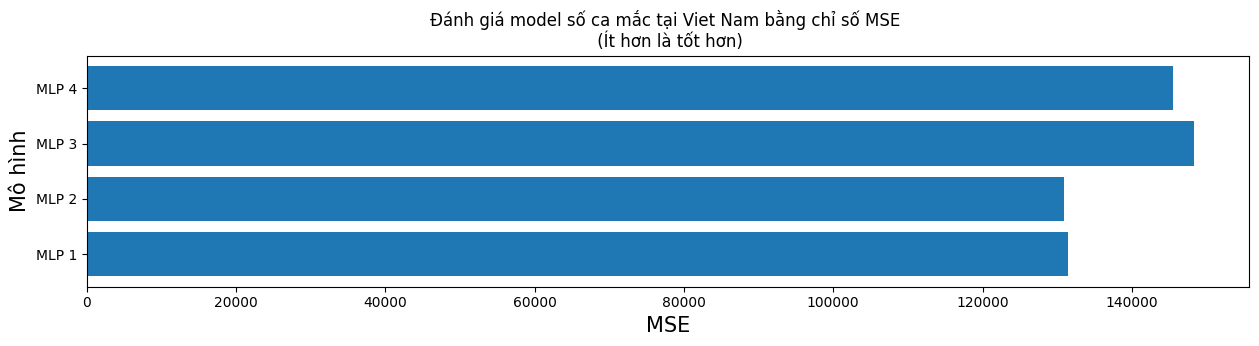

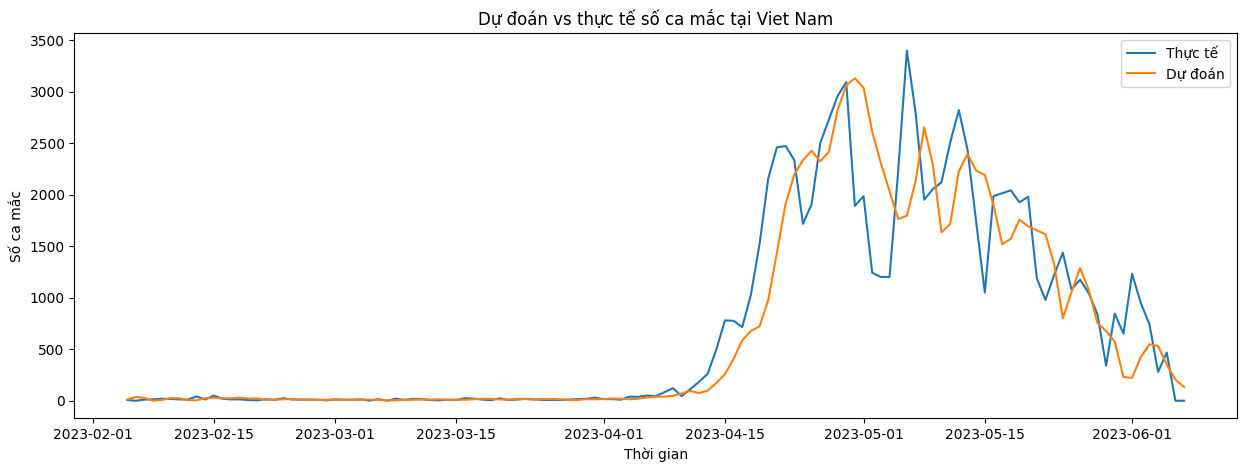

In [469]:
VietNam.training(show_title = True)

In [470]:
VietNam.save_model_result

[{'nb_hidden_layer': 1,
  'nb_neuron': [60],
  'mse': 131415.62295081967,
  'mae': 210.37704918032787,
  'r2': 0.1502851350992177},
 {'nb_hidden_layer': 2,
  'nb_neuron': [60, 120],
  'mse': 130949.20491803279,
  'mae': 209.7295081967213,
  'r2': 0.15330092825088215},
 {'nb_hidden_layer': 3,
  'nb_neuron': [60, 120, 60],
  'mse': 148293.26229508198,
  'mae': 228.91803278688525,
  'r2': 0.04115670186399312},
 {'nb_hidden_layer': 4,
  'nb_neuron': [60, 120, 60, 30],
  'mse': 145537.8524590164,
  'mae': 223.59016393442624,
  'r2': 0.05897279285855428}]

In [472]:
VietNam.best_model_evaluation

{'mse': 174157.31707317074, 'mae': 228.5528455284553, 'r2': 0.8063764906078427}

### 3.2.2. Mỹ

In [473]:
USA = AnalysisByCountry('US')

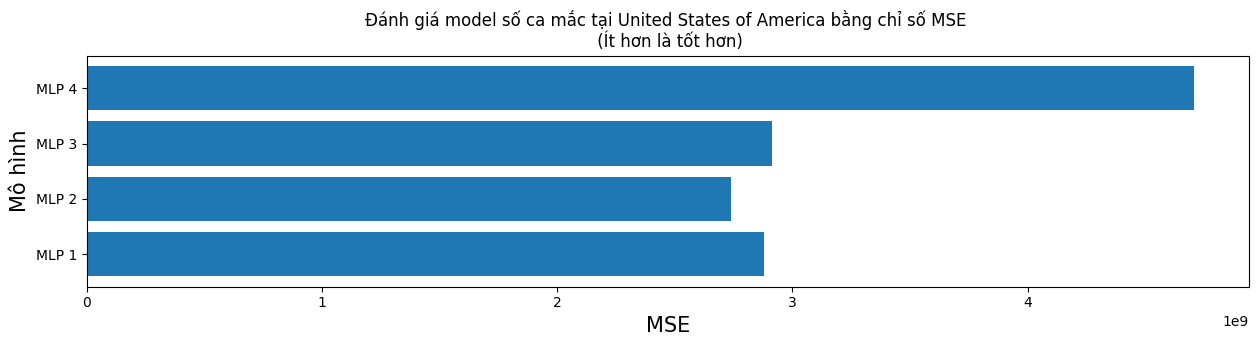

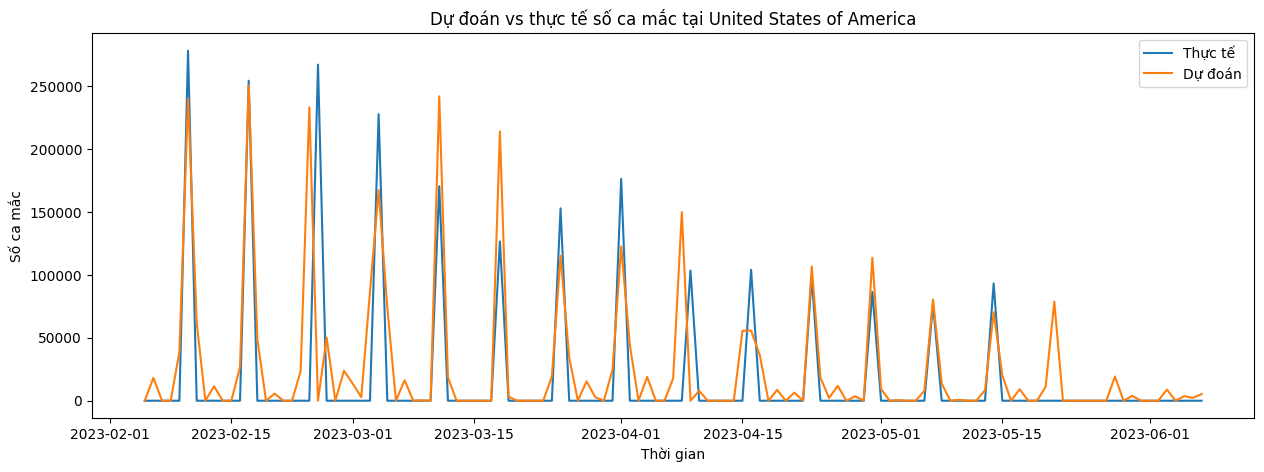

In [475]:
USA.training(show_title = True)

In [477]:
USA.save_model_result

[{'nb_hidden_layer': 1,
  'nb_neuron': [60],
  'mse': 2880252639.8688526,
  'mae': 29600.70491803279,
  'r2': 0.7992217301098632},
 {'nb_hidden_layer': 2,
  'nb_neuron': [60, 120],
  'mse': 2736846712.180328,
  'mae': 29702.819672131147,
  'r2': 0.8092183511196795},
 {'nb_hidden_layer': 3,
  'nb_neuron': [60, 120, 60],
  'mse': 2911223092.3688526,
  'mae': 28777.27049180328,
  'r2': 0.7970628243997906},
 {'nb_hidden_layer': 4,
  'nb_neuron': [60, 120, 60, 30],
  'mse': 4705849226.54918,
  'mae': 39544.87704918033,
  'r2': 0.6719620171536743}]

In [478]:
USA.best_model_evaluation

{'mse': 1862114513.0813007,
 'mae': 18470.934959349594,
 'r2': 0.3947696991599804}

### 3.2.3. Ấn Độ

In [479]:
India = AnalysisByCountry('IN')

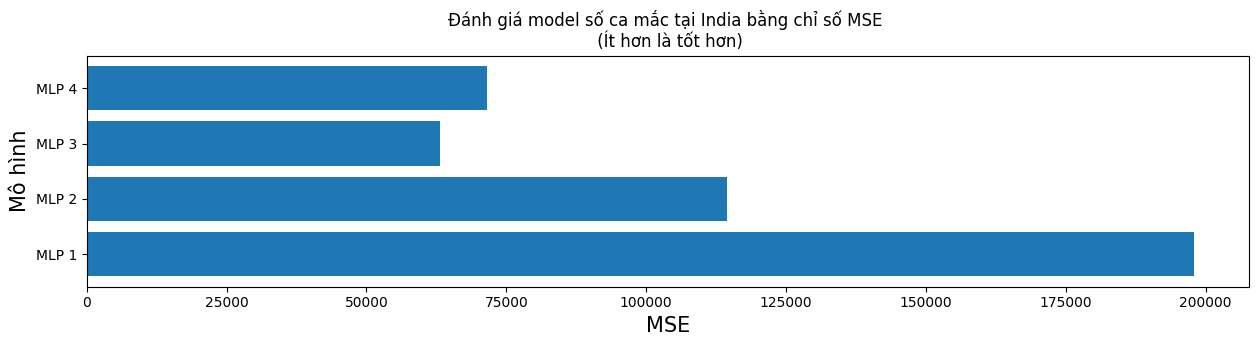

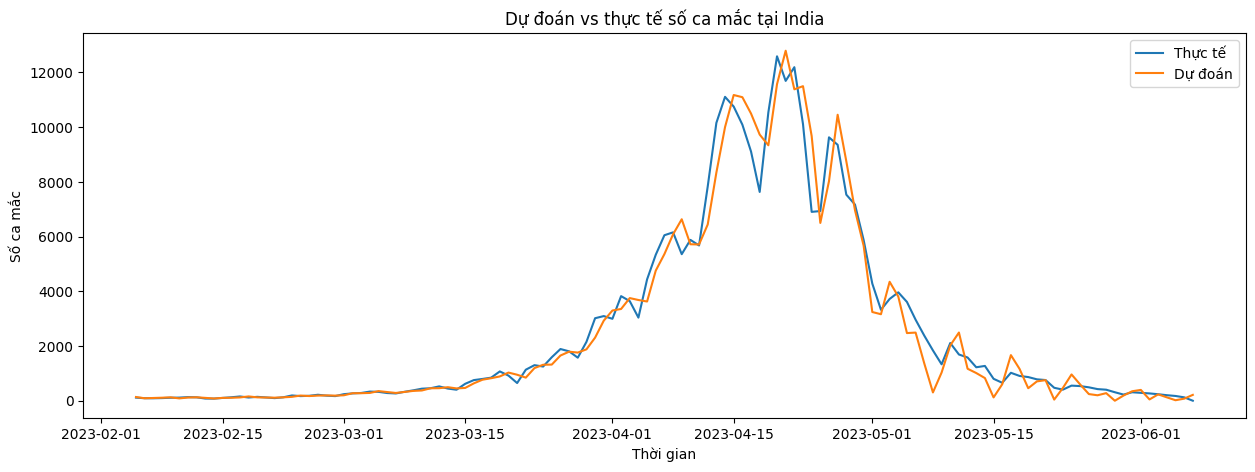

In [481]:
India.training(show_title = True)

In [483]:
India.save_model_result

[{'nb_hidden_layer': 1,
  'nb_neuron': [60],
  'mse': 197880.368852459,
  'mae': 276.76229508196724,
  'r2': 0.6792118171692612},
 {'nb_hidden_layer': 2,
  'nb_neuron': [60, 120],
  'mse': 114533.26229508196,
  'mae': 207.7704918032787,
  'r2': 0.814327629878687},
 {'nb_hidden_layer': 3,
  'nb_neuron': [60, 120, 60],
  'mse': 63069.10655737705,
  'mae': 128.79508196721312,
  'r2': 0.8977572954678278},
 {'nb_hidden_layer': 4,
  'nb_neuron': [60, 120, 60, 30],
  'mse': 71599.12295081967,
  'mae': 145.58196721311475,
  'r2': 0.883929099804775}]

In [484]:
India.best_model_evaluation

{'mse': 388893.35772357724, 'mae': 364.3008130081301, 'r2': 0.9650973030195278}

### 3.2.4. Ý

In [448]:
Italy = AnalysisByCountry('IT')

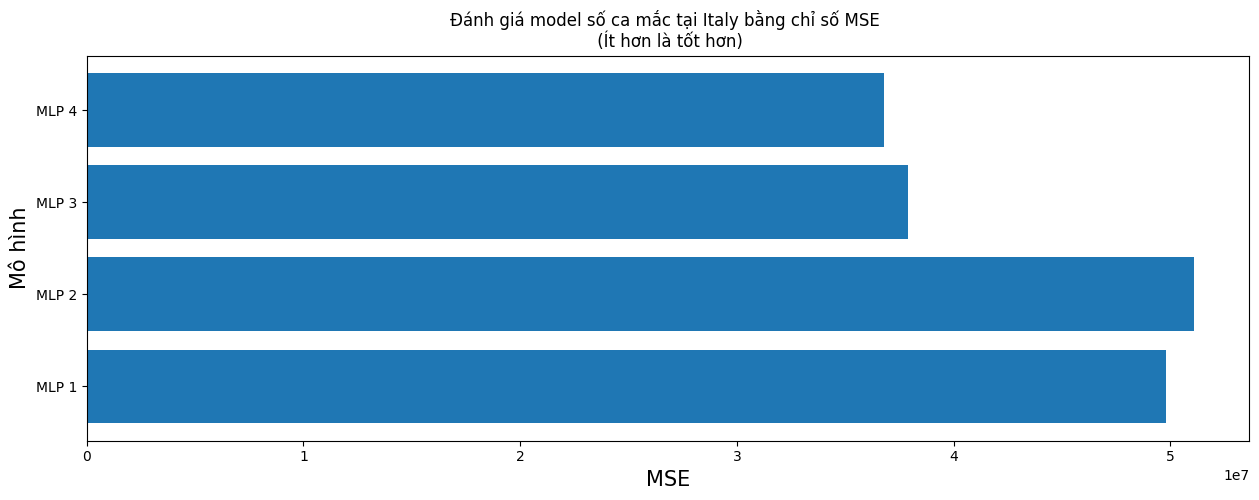

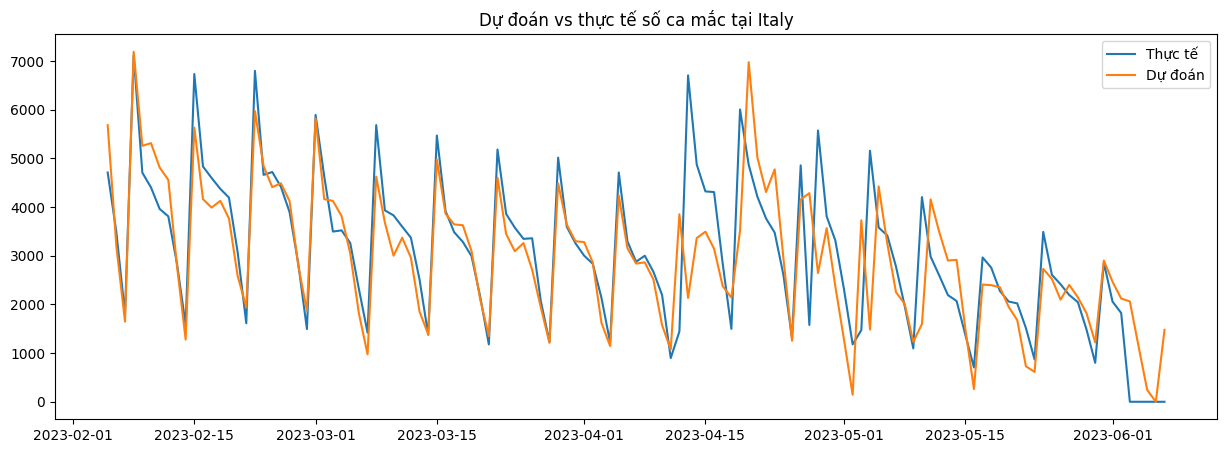

In [449]:
Italy.training()

In [450]:
Italy.best_model_evaluation

{'mse': 965395.5528455285, 'mae': 629.9430894308944, 'r2': 0.5953443790741173}

### 3.2.5. Pháp

In [451]:
France = AnalysisByCountry('FR')

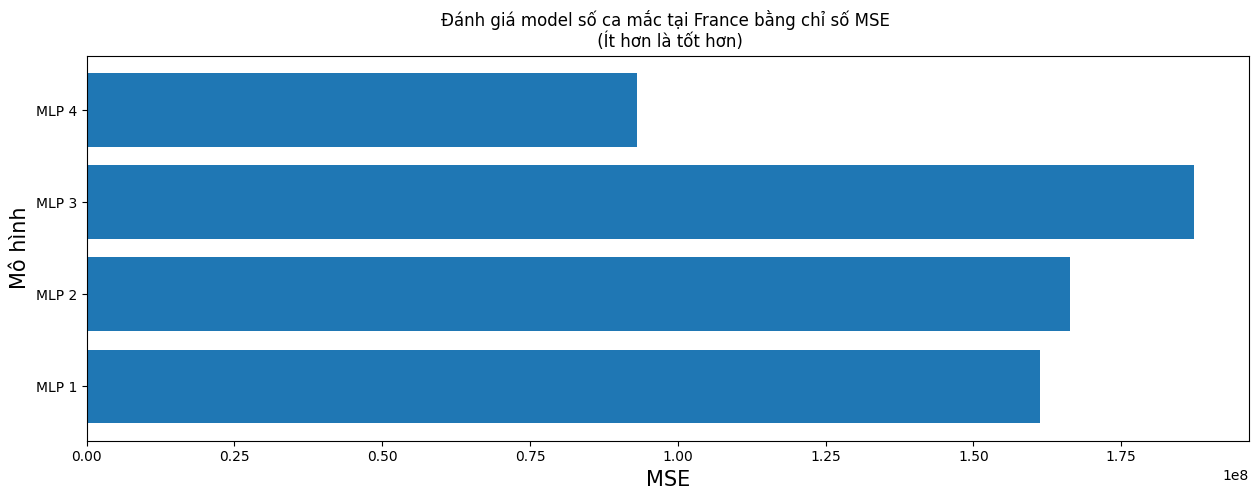

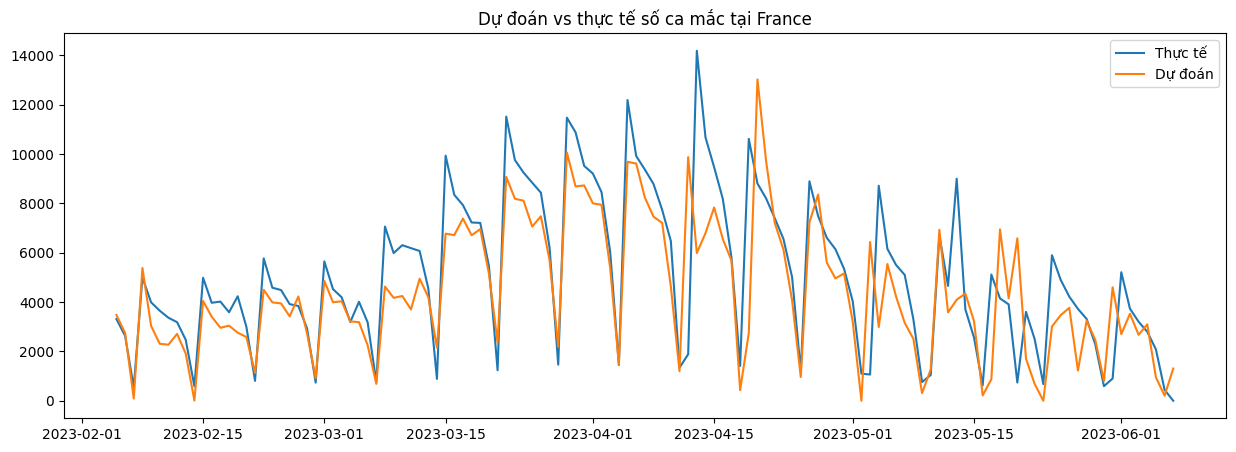

In [452]:
France.training()

In [453]:
France.best_model_evaluation

{'mse': 4356851.731707317, 'mae': 1360.9024390243903, 'r2': 0.5525342057142375}